# <img style="float: left; padding-right: 10px; width: 45px" src="iacs.png"> S-109A Introduction to Data Science: 

## Homework 6: Ensemble Methods, and Neural Networks


**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">



In [40]:
from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()

## Assumed Skills:
This assignment presumes knowledge of the following skills:
- Familiarity with sklearn's model objects
- Cross validation to estimate models' future performance
- Booststrapping to build alternative datasets
- Some instruction on Keras' interface for building and training neural networks

Import libraries:

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

# Higgs Boson Discovery

The discovery of the Higgs boson in July 2012 marked a fundamental breakthrough in particle physics. The Higgs boson particle was discovered through experiments at the Large Hadron Collider at CERN, by colliding beams of protons at high energy. A key challenge in analyzing the results of these experiments is to differentiate between collisions that produce Higgs bosons and collisions that produce only background noise. We shall explore the use of ensemble methods for this classification task.

You are provided with data from Monte-Carlo simulations of collisions of particles in a particle collider experiment. The training set is available in `Higgs_train.csv` and the test set is in `Higgs_test.csv`. Each row in these files corresponds to a particle collision described by 28 features (columns 1-28), of which the first 21 features are kinematic properties measured by the particle detectors in the accelerator, and the remaining features are derived by physicists from the first 21 features. The class label is provided in the last column, with a label of 1 indicating that the collision produces Higgs bosons (signal), and a label of 0 indicating that the collision produces other particles (background). 

The data set provided to you is a small subset of the HIGGS data set in the UCI machine learning repository. The following paper contains further details about the data set and the predictors used: <a href = "https://www.nature.com/articles/ncomms5308">Baldi et al., Nature Communications 5, 2014</a>.

In [42]:
data_train = pd.read_csv('data/Higgs_train.csv')
data_test = pd.read_csv('data/Higgs_test.csv')

In [43]:
data_train.head()

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,class
0,0.377,-1.5800,-1.7100,0.991,0.114,1.250,0.620,-1.480,2.17,0.754,0.7750,-0.667,2.21,1.280,-1.190,0.505,0.00,1.110,-0.464,0.397,0.00,0.522,1.320,0.982,1.360,0.965,1.310,1.080,1.0
1,0.707,0.0876,-0.4000,0.919,-1.230,1.170,-0.553,0.886,2.17,1.300,0.7620,-1.060,2.21,0.607,0.459,1.020,0.00,0.497,0.956,0.236,0.00,0.440,0.829,0.992,1.160,2.220,1.190,0.938,1.0
2,0.617,0.2660,-1.3500,1.150,1.040,0.955,0.377,-0.148,0.00,1.060,-0.0194,1.110,0.00,1.470,0.205,-1.060,2.55,1.490,-0.398,-0.542,0.00,1.020,1.030,0.986,0.928,1.370,0.982,0.917,1.0
3,0.851,-0.3810,-0.0713,1.470,-0.795,0.692,0.883,0.497,0.00,1.620,0.1240,1.180,1.11,1.290,0.160,-0.916,2.55,0.945,0.796,-1.520,0.00,1.200,1.100,0.987,1.350,1.460,0.995,0.954,1.0
4,0.768,-0.6920,-0.0402,0.615,0.144,0.749,0.397,-0.874,0.00,1.150,0.1270,1.320,2.21,0.730,-0.758,-1.120,0.00,0.848,0.107,0.502,1.55,0.922,0.864,0.983,1.370,0.601,0.919,0.957,0.0


In [44]:
X_train = data_train.iloc[:, data_train.columns != 'class']
y_train = data_train['class'].values
X_test = data_test.iloc[:, data_test.columns != 'class']
y_test = data_test['class'].values

## Question 1 (12pts): A Single Model
We start by fitting a basic model we can compare the other models to. We'll pick an optimally-tuned decision tree as the base model, because we'll later include random forests and want a fair comparison.

<div class='exercise'> Question 1</div>
** 1.1**  Fit a decision tree model to the training set. Determine the depth-of-tree parameter via 5-fold cross-validation and plot the estimated performance +/- 2 standard deviations for the various depths.

** 1.2** Select an appropriate maximum depth-of-tree, and justify your choice.

**1.3** Report the model's classification accuracy on the test set.

**Answers**:  
**1.1:** Fit a decision tree model to the training set. Determine the depth-of-tree parameter via 5-fold cross-validation and plot the estimated performance +/- 2 standard deviations for the various depths.

Text(0,0.5,'Estimated performance')

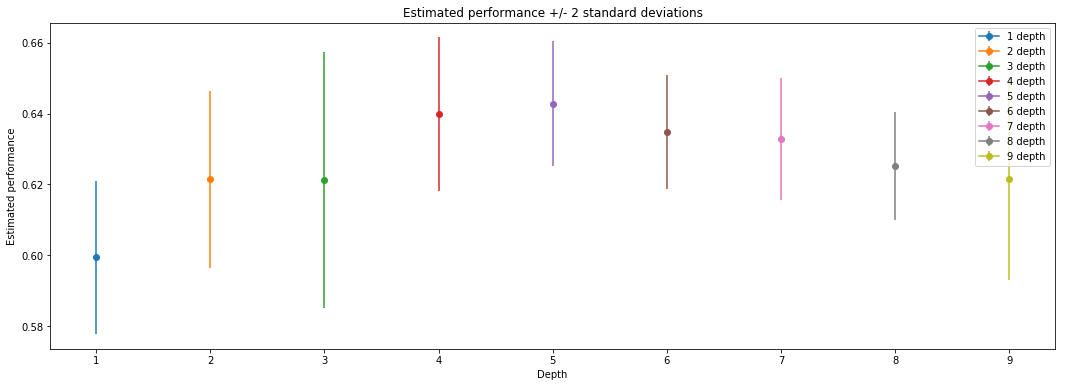

In [45]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(18,6))

for cur_depth in range(1,10):
    model = DecisionTreeClassifier(max_depth = cur_depth)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    plt.errorbar(cur_depth, np.mean(scores), 2*np.std(scores), marker='o', label=str(cur_depth)+' depth')

ax.legend()
ax.set_title('Estimated performance +/- 2 standard deviations')
ax.set_xlabel('Depth')
ax.set_ylabel('Estimated performance')

** 1.2** Select an apropriate maximum depth-of-tree, and justify your choice.

<HR>
Appropriate maximum depth is 5 since it has the highest mean and it's 2 standard deviation ensures it's the best bet.
<HR>

**1.3** Report the model's classification accuracy on the test set.

In [46]:
# your code here
accuracy = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train).score(X_test, y_test)
print('Model\'s classification accuracy on the test set: {0}%'.format(accuracy*100))

Model's classification accuracy on the test set: 64.8%


## Question 2 (14 pts): Bagging
Bagging is the technique of building the same model on multiple bootstraps from the data and combining each model's prediction to get an overall classification. In this question we build an example by hand and study how the number of bootstrapped datasets impacts the combined accuracy.

<div class='exercise'> Question 2</div>
**2.1** Create 25 bootstrapped replications of the original training data, and fit a decision tree of depth 5 to each. Record each tree's prediction. In particular, produce a dataset like those below, where each row is a training example, each column is a tree from the forest, and each entry is that tree's prediction for that training example.

`bagging_train`:

|     |bootstrap model 1's prediction|bootstrap model 2's prediction|...|bootstrap model 25's prediction|
| --- | --- | --- | --- |
|training row 1| binary value | binary value|... |binary value|
|training row 2| binary value| binary value|... |binary value|
|...| ...| ...|... |... |

`bagging_test`:

|     |bootstrap model 1's prediction|bootstrap model 2's prediction|...|bootstrap model 25's prediction|
| --- | --- | --- | --- |
|test row 1| binary value | binary value|... |binary value|
|test row 2| binary value| binary value|... |binary value|
|...| ...| ...|... |... |

Store these results as `bagging_train` and `bagging_test`.

**2.2** _Aggregate_ all 25 _bootstrapped_ models to get a combined prediction for each training and test point: predict a 1 if and only if a majority of the 25 models predict that example to be from class 1. Verify that this bagging model scores either 67% or 68% accuracy on the test set.

**2.3** We want to know how the number of bootstraps affects our bagging ensemble's performance. Use the `running_predictions` function to get the model's accuracy score when using only 1,2,3,4,... of the bootstrapped models. Make a plot of training and test set accuracy as a function of number of bootstraps.

**2.4** Analyze the graph from 2.3 and discuss the effect of adding more bootstrapped models to the ensemble. What number of trees would you use in a production model to be cost-effective?

**Hints**
- Use `resample` from sklearn to easily bootstrap the x and y data.
- use `np.mean` to easily test for majority. If a majority of models vote 1, what does that imply about the mean?

In [47]:
def running_predictions(prediction_dataset, targets):
    """A function to predict examples' class via the majority among trees (ties are predicted as 0)
    
    Inputs:
      prediction_dataset - a (n_examples by n_sub_models) dataset, where each entry [i,j] is sub-model j's prediction
          for example i
      targets - the true class labels
    
    Returns:
      a vector where vec[i] is the model's accuracy when using just the first i+1 sub-models
    """
    
    n_trees = prediction_dataset.shape[1]
    
    # find the running percentage of models voting 1 as more models are considered
    running_percent_1s = np.cumsum(prediction_dataset, axis=1)/np.arange(1,n_trees+1)
    
    # predict 1 when the running average is above 0.5
    running_conclusions = running_percent_1s > 0.5
    
    # check whether the running predictions match the targets
    running_correctnesss = running_conclusions == targets.reshape(-1,1)
    
    return np.mean(running_correctnesss,axis=0)
    # returns a 1-d series of the accuracy of using the first n trees to predict the targets

**Answers**:  
**2.1** Create 25 bootstrapped replications of the original training data, and fit a decision tree of depth 5 to each. In particular, produce a dataset similar to 2.1, where each row is a training example, each column is a tree from the forest, but each entry is that tree's prediction of the _probability_ that training example comes from class 1.

In [48]:
# your code here
N = 25
training_rows = np.zeros([X_train.shape[0], N])
train_column = np.zeros(X_train.shape[0])
test_column = np.zeros(X_test.shape[0])

for cur_bootstrap_rep in range(N):
    inds_to_sample = np.random.choice(X_train.index.values, size=X_train.shape[0], replace=True)
    # take the sample
    X_train_resample = X_train.loc[inds_to_sample]
    y_train_resample = y_train[inds_to_sample]

    # fit the model
    bootstrap_model = DecisionTreeClassifier(max_depth=5).fit(X_train_resample, y_train_resample)
    y_train_pred = bootstrap_model.predict(X_train)
    y_test_pred = bootstrap_model.predict(X_test)
    train_column = np.column_stack((train_column, y_train_pred))
    test_column = np.column_stack((test_column, y_test_pred))

bagging_train = pd.DataFrame(train_column[:,1:], 
                             index=['training row {0}'.format(row_index) 
                                    for row_index in np.arange(1, X_train.shape[0]+1)],
                             columns=['bootstrap model {0}\'s prediction'.format(column_index) 
                                      for column_index in np.arange(1,26)])
bagging_test = pd.DataFrame(test_column[:,1:], 
                            index=['test row {0}'.format(row_index) 
                                    for row_index in np.arange(1, X_test.shape[0]+1)],
                            columns=['bootstrap model {0}\'s prediction'.format(column_index) 
                                     for column_index in np.arange(1,26)])

bagging_train.head()

,bootstrap model 1's prediction,bootstrap model 2's prediction,bootstrap model 3's prediction,bootstrap model 4's prediction,bootstrap model 5's prediction,bootstrap model 6's prediction,bootstrap model 7's prediction,bootstrap model 8's prediction,bootstrap model 9's prediction,bootstrap model 10's prediction,bootstrap model 11's prediction,bootstrap model 12's prediction,bootstrap model 13's prediction,bootstrap model 14's prediction,bootstrap model 15's prediction,bootstrap model 16's prediction,bootstrap model 17's prediction,bootstrap model 18's prediction,bootstrap model 19's prediction,bootstrap model 20's prediction,bootstrap model 21's prediction,bootstrap model 22's prediction,bootstrap model 23's prediction,bootstrap model 24's prediction,bootstrap model 25's prediction
training row 1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
training row 2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
training row 3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
training row 4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
training row 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


**2.2** _Aggregate_ all 25 _bootstrapped_ models to get a combined prediction for each training and test point: predict a 1 if and only if a majority of the 25 models predict that example to be from class 1. Verify that this bagging model scores either 67% or 68% accuracy on the test set.

In [49]:
# your code here
train_predictions = np.mean(bagging_train, axis=1) >.5
test_predictions = np.mean(bagging_test, axis=1) >.5

accuracy = test_predictions==y_test
print('Bagging model prediction accuray on test set: {0:2.4}%'.format(np.mean(accuracy)*100))

Bagging model prediction accuray on test set: 67.48%


**2.3** We want to know how the number of bootstraps affects our bagging ensemble's performance. Use the `running_predictions` function to get the model's accuracy score when using only 1,2,3,4,... of the bootstrapped models. Make a plot of training and test set accuracy as a function of number of bootstraps.

Text(0,0.5,'Accuracy')

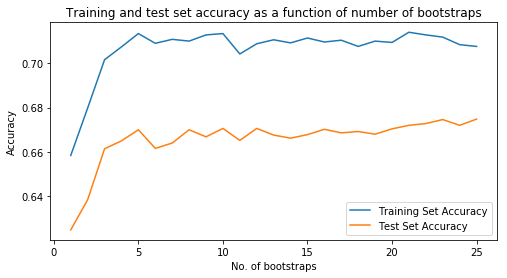

In [50]:
# your code here
train_vector = running_predictions(bagging_train.iloc[:, :25].values, y_train)
test_vector = running_predictions(bagging_test.iloc[:, :25].values, y_test)

fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(np.arange(1,26), train_vector, label='Training Set Accuracy')
ax.plot(np.arange(1,26), test_vector, label='Test Set Accuracy')

ax.legend()
ax.set_title('Training and test set accuracy as a function of number of bootstraps')
ax.set_xlabel('No. of bootstraps')
ax.set_ylabel('Accuracy')

In [51]:
test_vector

array([0.6248, 0.6384, 0.6614, 0.665 , 0.67  , 0.6616, 0.664 , 0.67  ,
       0.6668, 0.6706, 0.6652, 0.6706, 0.6676, 0.6662, 0.6678, 0.6702,
       0.6686, 0.6692, 0.668 , 0.6704, 0.672 , 0.6728, 0.6746, 0.672 ,
       0.6748])

**2.4** Analyze the graph from 2.3 and discuss the effect of adding more bootstrapped models to the ensemble. What number of trees would you use in a production model to be cost-effective?

<HR>
In general, as the number of bootstrap models increases, the prediction accuracy increases. <BR>

It looks like the test set accuracy peaks at the 15th bootstrap so production model should not exceed this. The jump from 6 to 15 is only of 1% so depending on how important that 1% increase is, it might be more cost effective to limit to 6 as well.
<HR>

## Question 3 (6 pts): Random Forests
Random Forests are closely related to the bagging model we built by hand in question 2. In this question we compare our by-hand results with the results of using `RandomForestClassifier` directly.

<div class='exercise'> Question 3</div>
**3.1** Fit a `RandomForestClassifier` to the original `X_train` data using 25 trees and a depth of 5. Comment on the model's test performance compared to the bagging model from Question 2.

**3.2** There are two improvements Random Forests make to the pure bagging approach in Question 2. What are they, and how do they help the random forest model do better than the pure bagging model?

**Hints**:
 - Random forests do not combine each tree's prediction via a majority vote. What do they use instead?

## **Answers**:  
**3.1** Fit a `RandomForestClassifier` to the original `X_train` data using 25 trees and a depth of 5. Comment on the model's test performance compared to the model from Question 2.

In [52]:
# your code here
random_forest_score = RandomForestClassifier(n_estimators=25, max_depth=5).fit(X_train,y_train).score(X_test, y_test)
print('The model\'s score: {0}'.format(random_forest_score))

The model's score: 0.6796


<HR>
The model's test performance is negligibly better than the model from Question 2 in this run.<BR>
Depending on the run, it might even drop below.
<HR>

**3.2** There are two improvements Random Forests make to the pure bagging approach in Question 2. What are they, and how do they help the random forest model do better than the pure bagging model?

<HR>
Random Forests improve variance by reducing correlation between trees, this is accomplished by random selection of feature-subset for split at each node. While Bagging improves variance by averaging/majority selection of outcome from multiple fully grown trees on variants of training set. It uses Bootstrap with replacement to generate multiple training sets.
    
The averaging over trees can substantially reduce instability that might otherwise result. 

There are often a few predictors that dominate the decision tree fitting process because on the average they consistently perform just a bit better than their competitors. Consequently, many other predictors, which could be useful for very local features of the data, are rarely selected as splitting variables. With random forests computed for a large enough number of trees, each predictor will have at least several opportunities to be the predictor defining a split. In those opportunities, it will have very few competitors. Much of the time a dominant predictor will not be included. Therefore, local feature predictors will have the opportunity to define a split.
<HR>

## Question 4 (12 pts): Boosting
In this question we explore a counterpart to bagging, where each new model is trained on a dataset weighted towards observations that the current set of models predicts incorrectly. 

We'll focus on the AdaBoost flavor of boosting and examine what happens to the ensemble model's accuracy over the algorithm's run.

<div class='exercise'> Question 4</div>
**4.1** Use `AdaBoostClassifier` to fit another ensemble to `X_train`. Use a decision tree of depth 3 as the base learner and a learning rate 0.05, and run the boosting for 400 iterations. Use the `staged_score` method to help make a plot of the effect of the number of estimators/iterations on the model's train and test accuracy.  

**4.2** Repeat the plot above for a base learner with depth in (1,2,3,4). What trends do you see in the training and test accuracy?

**4.3** Based on the plot from 4.2, what combination of base learner depth and number of iterations seems optimal? Why?

**4.4** AdaBoost doesn't combine its sub-models via simple majority vote, or by averaging probabilities. What does it use instead, and why do you think that combination rule was chosen?

**Answers**:  
**4.1** Use `AdaBoostClassifier` to fit another ensemble to `X_train`. Use a decision tree of depth 3 as the base learner and a learning rate 0.05, and run the boosting for 400 iterations. Use the `staged_score` method to help make a plot of the effect of the number of estimators/iterations on the model's train and test accuracy.

In [53]:
# your code here
ada_boost_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=400,
    learning_rate=0.05)

ada_boost_classifier.fit(X_train, y_train)

staged_scores = ada_boost_classifier.staged_score(X_test, y_test)

Text(0,0.5,'Accuracy')

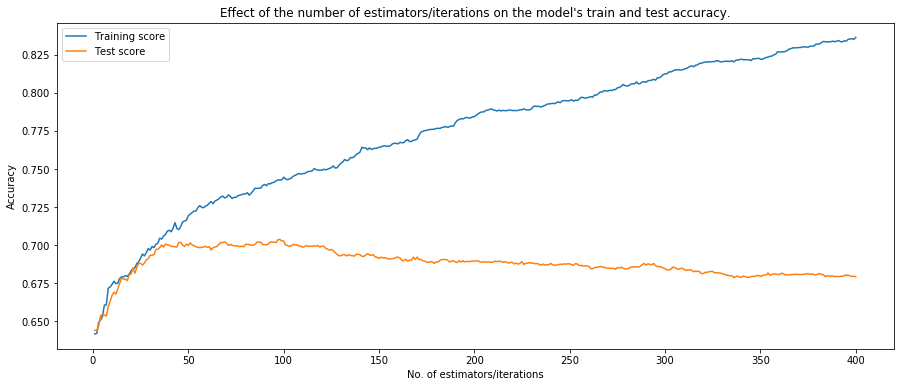

In [54]:
estimators_num=len(ada_boost_classifier.estimators_)
X=range(1,estimators_num+1)

fig, ax = plt.subplots(1,1, figsize=(15,6))

ax.plot(list(X),list(ada_boost_classifier.staged_score(X_train, y_train)),label="Training score")
ax.plot(list(X),list(ada_boost_classifier.staged_score(X_test, y_test)),label="Test score")

ax.legend()
ax.set_title('Effect of the number of estimators/iterations on the model\'s train and test accuracy.')
ax.set_xlabel('No. of estimators/iterations')
ax.set_ylabel('Accuracy')

**4.2** Repeat the plot above for a base learner with depth in (1,2,3,4). What trends do you see in the training and test accuracy?

Text(0.5,0.98,"Effect of the model's depth on train and test accuracy.")

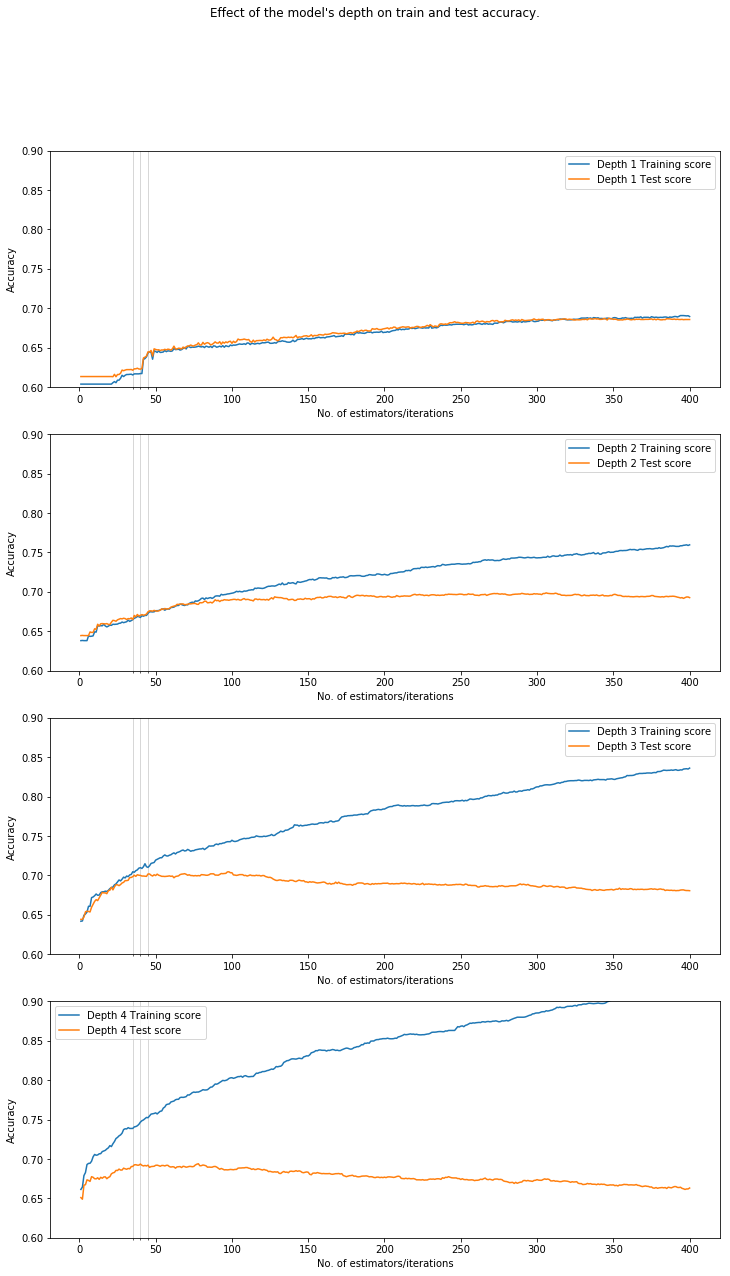

In [55]:
# your code here
fig, ax = plt.subplots(4,1, figsize=(12,20))

for iter_depth in [1,2,3,4]:
    ada_boost_classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=iter_depth),
        n_estimators=400,
        learning_rate=0.05)
    ada_boost_classifier.fit(X_train, y_train)
    staged_scores = ada_boost_classifier.staged_score(X_test, y_test)
    estimators_num=len(ada_boost_classifier.estimators_)
    X=range(1,estimators_num+1)
    ax[iter_depth-1].plot(list(X),list(ada_boost_classifier.staged_score(X_train, y_train)),
                          label="Depth {0} Training score".format(iter_depth))
    ax[iter_depth-1].plot(list(X),list(ada_boost_classifier.staged_score(X_test, y_test)),
                          label="Depth {0} Test score".format(iter_depth))
    ax[iter_depth-1].legend()
    ax[iter_depth-1].set_xlabel('No. of estimators/iterations')
    ax[iter_depth-1].set_ylabel('Accuracy')
    ax[iter_depth-1].set_ylim([0.6, 0.9])
    ax[iter_depth-1].set_xticks([35, 40, 45], minor=True)
    ax[iter_depth-1].grid(linestyle='-', linewidth=0.5, which='Minor')


fig.suptitle('Effect of the model\'s depth on train and test accuracy.')


<HR>
You can see that the accuracy peaks at just below 70%. As the depth increases, the accuracy reduces after hitting this peak with increase in number of iterations(except depth 1 but the peak is still the same). 
<HR>

**4.3** Based on the plot from 4.2, what combination of base learner depth and number of iterations seems optimal? Why?


<HR>
Based on the plot from 4.2 and our obvservation of the trends, a combination of base learners depth 3 and 45 iterations seems optimal. We will get our highest accuracy with optimal efficiency here. 
<HR>

**4.4** AdaBoost doesn't combine its sub-models via simple majority vote, or by averaging probabilities. What does it use instead, and why do you think that combination rule was chosen?

<HR>
Each model is weighted based on its skill and these weights are used when combining the predictions from all of the models on new data.
    
AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. It was used because the individual learners can be weak, but as long as the performance of each one is slightly better than random guessing, the final model can be proven to converge to a strong learner.
<HR>

## Question 5 (18 pts): Ensembling
In this question we take the running theme of combining model to its extreme. So far, we have been combining the predictions of relatively bad models; in this section we'll combine several strong models and achieve our best accuracy yet.

We provide well-tuned models in the file `models.pkl`. The code below will read in this data for you. The model_dict object contains 5 tuned models, under the names "Ada", "KNN", "Logit", "QDA", and "RF".

**5.1**: Report each of the 5 tuned models' score on the test set, so that you can compare to these scores later.

**5.2**: Read in the fresh dataset `data/Higgs_tune.csv` Similar to 2.1, build `ensemble_tune` and `ensemble_test`, datasets containing each tuned model's prediction of P(this point belongs to class 1) for each of the tuning and test points.

**5.3**: Build a meta-model trained on `ensemble_tune` and predicting the tuning set labels (e.g., a LogisticRegression or RandomForest). Which model does your meta-model consider most important, and how well does your meta-model perform on the test set?

**5.4**: Augment the `ensemble_tune` and `ensemble_test` datasets with the columns from the original tuning and test data to form `augmented_tune` and `augmented_test`. Fit a decision tree model to this new tuning data (max depth 5, no mximum number of features).

**5.5**: How well does the meta-tree do on the test set? Why does training a decision tree on the combination of original data and model predictions perform so well?

**5.6**: Suggest one way to improve on the model above

In [56]:
# will produce a warning under most versions of SKlearn, but it should be OK to ignore
# if you get weird errors or the models all stink, let us know

import pickle
with open("data/models.pkl", 'rb') as infile:
    model_dict = pickle.load(infile)

**Answers**:

**5.1**: Report each model's score on the test set, so that you can compare to these scores later.

In [57]:
# your code here
for model_name, model in model_dict.items():
    test_score = model.score(X_test, y_test)
    print('{0} model\'s test score: {1}'.format(model_name, test_score))

Ada model's test score: 0.6756
RF model's test score: 0.6748
Logit model's test score: 0.6384
QDA model's test score: 0.633
KNN model's test score: 0.5774


**5.2**: Read in the fresh dataset `data/Higgs_tune.csv`.  Similar to 2.1, build `ensemble_tune` and `ensemble_test`, datasets containing each tuned model's prediction of P(this point belongs to class 1) for each of the tuning and test points.

In [73]:
# your code here
data_tune = pd.read_csv('data/Higgs_tune.csv')
X_tune = data_tune.iloc[:, data_tune.columns != 'class']
y_tune = data_tune['class'].values
X_tune.head()

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.717,-0.450,-0.0435,0.975,1.430,0.845,0.264,1.500,0.00,0.679,0.342,-1.570,0.00,0.977,0.704,-0.0185,2.55,0.713,-1.1200,0.494,0.0,1.230,1.050,1.12,0.710,0.540,0.673,0.655
1,0.719,1.390,0.1020,1.140,1.240,0.758,2.740,-1.030,0.00,0.660,0.804,1.070,2.21,0.418,1.570,-0.2030,0.00,0.771,-0.7270,-0.456,3.1,0.879,1.230,1.07,1.080,0.882,1.210,1.010
2,2.320,0.074,-0.6260,0.909,-0.795,1.240,-0.418,1.200,0.00,0.463,-0.355,0.151,2.21,0.683,0.717,0.6810,2.55,0.431,0.0978,-1.690,0.0,0.640,0.768,1.01,0.945,0.456,0.695,0.905
3,0.626,-0.346,-1.5800,2.100,0.878,1.140,-0.341,-1.150,0.00,0.415,-0.549,-0.313,2.21,1.620,-0.330,0.2520,2.55,0.517,1.5800,-1.690,0.0,1.700,1.100,1.27,0.973,0.433,0.971,0.977
4,0.320,-1.100,-0.8350,2.770,1.210,1.280,0.453,-0.698,2.17,1.140,0.221,0.602,2.21,1.290,1.060,-1.0500,0.00,0.734,1.6100,0.331,0.0,1.100,1.120,1.26,1.330,1.650,1.570,1.550


In [66]:
tune_column = np.zeros(X_tune.shape[0])
test_column = np.zeros(X_test.shape[0])

for model_name, model in model_dict.items():
    y_tune_pred = model.predict_proba(X_tune)[:,1]
    y_test_pred = model.predict_proba(X_test)[:,1]
    tune_column = np.column_stack((tune_column, y_tune_pred))
    test_column = np.column_stack((test_column, y_test_pred))

ensemble_tune = pd.DataFrame(tune_column[:,1:], 
                             index=['tuning row {0}'.format(row_index) 
                                    for row_index in np.arange(1, X_tune.shape[0]+1)],
                             columns=['{0} model\'s prediction'.format(column_index) 
                                      for column_index in model_dict.keys()])
ensemble_test = pd.DataFrame(test_column[:,1:], 
                            index=['test row {0}'.format(row_index) 
                                    for row_index in np.arange(1, X_test.shape[0]+1)],
                            columns=['bootstrap model {0}\'s prediction'.format(column_index) 
                                     for column_index in model_dict.keys()])

In [67]:
ensemble_tune.head()

,Ada model's prediction,RF model's prediction,Logit model's prediction,QDA model's prediction,KNN model's prediction
tuning row 1,0.476499,0.497049,0.713247,0.867147,0.60
tuning row 2,0.548898,0.549102,0.629934,0.766266,0.50
tuning row 3,0.455639,0.418363,0.437730,0.174581,0.70
tuning row 4,0.489579,0.451090,0.759375,0.759620,0.64
tuning row 5,0.465777,0.355656,0.202824,0.005958,0.50


**5.3**: Build a meta-model trained on `ensemble_tune` and predicting the tuning set labels (e.g., a LogisticRegression or RandomForest). Which model does your meta-model consider most important, and how well does your meta-model perform on the test set?

In [80]:
# your code here

fitted_tree = RandomForestClassifier().fit(ensemble_tune, y_tune)

print("Weights of individual models in meta-model: {}".format(fitted_tree.feature_importances_))
print("Test accuracy (Classify by RandomForest on individual predictions): ", fitted_tree.score(ensemble_test, y_test))

Weights of individual models in meta-model: [0.23810084 0.26199545 0.19069818 0.21059679 0.09860875]
Test accuracy (Classify by RandomForest on individual predictions):  0.7904


<HR>
The meta-model considers the Random Forest model the most important with 26.2% weight.

Test accuracy (Classify by RandomForest on individual predictions): 79.04%
<HR>

**5.4**: Augment the `ensemble_tune` and `ensemble_test` datasets with the columns from the original tuning and test data to form `augmented_tune` and `augmented_test`. Fit a decision tree model to this new tuning data (max depth 5, no mximum number of features).

In [76]:
# your code here
augmented_tune = pd.DataFrame(np.column_stack((ensemble_tune, X_tune)),
                             index=ensemble_tune.index,
                             columns=np.append(ensemble_tune.columns, X_tune.columns))
augmented_test = pd.DataFrame(np.column_stack((ensemble_test, X_test)),
                             index=ensemble_test.index,
                             columns=np.append(ensemble_test.columns, X_test.columns))

aug_model = DecisionTreeClassifier(max_depth=5).fit(augmented_tune, y_tune)

In [77]:
augmented_tune.head()

,Ada model's prediction,RF model's prediction,Logit model's prediction,QDA model's prediction,KNN model's prediction,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
tuning row 1,0.476499,0.497049,0.713247,0.867147,0.60,0.717,-0.450,-0.0435,0.975,1.430,0.845,0.264,1.500,0.00,0.679,0.342,-1.570,0.00,0.977,0.704,-0.0185,2.55,0.713,-1.1200,0.494,0.0,1.230,1.050,1.12,0.710,0.540,0.673,0.655
tuning row 2,0.548898,0.549102,0.629934,0.766266,0.50,0.719,1.390,0.1020,1.140,1.240,0.758,2.740,-1.030,0.00,0.660,0.804,1.070,2.21,0.418,1.570,-0.2030,0.00,0.771,-0.7270,-0.456,3.1,0.879,1.230,1.07,1.080,0.882,1.210,1.010
tuning row 3,0.455639,0.418363,0.437730,0.174581,0.70,2.320,0.074,-0.6260,0.909,-0.795,1.240,-0.418,1.200,0.00,0.463,-0.355,0.151,2.21,0.683,0.717,0.6810,2.55,0.431,0.0978,-1.690,0.0,0.640,0.768,1.01,0.945,0.456,0.695,0.905
tuning row 4,0.489579,0.451090,0.759375,0.759620,0.64,0.626,-0.346,-1.5800,2.100,0.878,1.140,-0.341,-1.150,0.00,0.415,-0.549,-0.313,2.21,1.620,-0.330,0.2520,2.55,0.517,1.5800,-1.690,0.0,1.700,1.100,1.27,0.973,0.433,0.971,0.977
tuning row 5,0.465777,0.355656,0.202824,0.005958,0.50,0.320,-1.100,-0.8350,2.770,1.210,1.280,0.453,-0.698,2.17,1.140,0.221,0.602,2.21,1.290,1.060,-1.0500,0.00,0.734,1.6100,0.331,0.0,1.100,1.120,1.26,1.330,1.650,1.570,1.550


**5.5**: How well does the meta-tree do on the test set? Why does training a decision tree on the combination of original data and model predictions perform so well?

In [78]:
# your code here
accuracy = aug_model.score(augmented_test, y_test)
print('Model\'s classification accuracy on the test set: {0:2.4}%'.format(accuracy*100))

Model's classification accuracy on the test set: 70.32%


----
Your answer here

----

**5.6**: Suggest one way to improve on the model above

In [26]:
# your code here (optional)

<HR>
One way to improve could be adding quadratic terms of the initial features.
<HR>

## Question 6 (12 pts): Understanding
This question is an overall test of your knowledge of this homework's material. You may need to refer to lecture notes and other material outside this homework to answer these questions.

<div class='exercise'> Question 6</div>
**6.1** How do ensembling, boosting, and bagging all relate: what is common to all three, and what is unique to each of them?

**6.2** Which technique, boosting or bagging, is better suited to parallelization, where you could have multiple computers working on a problem at the same time?

**6.3** What is the impact of having too many trees/iterations in boosting and in bagging? In which instance is it worse to overshoot?

**6.4** Suppose you have 10,000 training observations and have selected (non-polynomial) linear regression as your base model. Which technique will help your model more, boosting or bagging? How does your choice (and boosting/bagging in general) tie to overfitting versus underfitting?

**Answers**:  
**6.1** How do ensembling, boosting, and bagging all relate: what is common to all three, and what is unique to each of them?

<HR>
Bagging and Boosting are similar in that they are both ensemble techniques, where a set of weak learners are combined to create a strong learner that obtains better performance than a single one. 
    
Bagging and Boosting get N learners by generating additional data in the training stage. N new training data sets are produced by random sampling with replacement from the original set. By sampling with replacement some observations may be repeated in each new training data set.

In the case of Bagging, any element has the same probability to appear in a new data set. However, for Boosting the observations are weighted and therefore some of them will take part in the new sets more often.

In Bagging the result is obtained by averaging the responses of the N learners (or majority vote). However, Boosting assigns a second set of weights, this time for the N classifiers, in order to take a weighted average of their estimates.

If the problem is that the single model gets a very low performance, Bagging will rarely get a better bias. However, Boosting could generate a combined model with lower errors as it optimises the advantages and reduces pitfalls of the single model. By contrast, if the difficulty of the single model is over-fitting, then Bagging is the best option. Boosting for its part doesn’t help to avoid over-fitting; in fact, this technique is faced with this problem itself.
<HR>

**6.2** Which technique, boosting or bagging, is better suited to parallelization, where you could have multiple computers working on a problem at the same time?

<HR>
While the training stage is parallel for Bagging (i.e., each model is built independently), Boosting builds the new learner in a sequential way.
<HR>

**6.3** What is the impact of having too many trees/iterations in boosting and in bagging? In which instance is it worse to overshoot?

<HR>
In bagging, as the number of iterations increases, the accuracy increases till it reaches a peak and then plateaus off. As the number of boosting iterations increases, it generates a decision surface with greater margin. New examples are classified with greater confidence and accuracy. On the other hand, the instances for which the probability of error of individual models is high, are wrongly classified with greater confidence. 
    
Thus, it is worse to overshoot in case of boosting.
<HR>

**6.4** Suppose you have 10,000 training examples and have selected (non-polynomial) linear regression as your base model. Which technique will help your model more, boosting or bagging? How does your choice (and boosting/bagging general) tie to overfitting versus underfitting?


<HR>
Boosting is useful for large training sample sizes, while bagging is useful for critical training sample sizes.

Bagging is usually a good way to avoid overfitting but Linear Regression is not very prone to overfitting so you are probably not going to win much. 

Computations cost for bagging with be high for a dataset of this size.

Boosting will help more. 
<HR>

<hr style='height:2pt'>
## Question 7 (26 points): Neural Networks
Neural networks are, of course, a large and complex topic that cannot be covered in a single homework. Here we'll focus on the key idea of NNs: they are able to learn a mapping from example input data (of fixed size) to example output data (of fixed size). We'll also partially explore what patterns the neural network learns and how well they generalize.

In this question we'll see if Neural Networks can learn a (limited) version of the Fourier Transform. (The Fourier Transform takes in values from some function and returns a set of sine and cosine functions which, when added together, approximate the original function.)

In our specific problem, we'll try to teach a network to map from  a function's 1000 sample y-values to the four features of the sine and cosine waves that make up that function. Thus, the network is attempting to learn a mapping from a 1000-entry vector down to a 4-entry vector. Our X_train dataset is thus N by 1000 and our y_train is N by 4. 

We'll use 6 data files in this question:
- `sinewaves_X_train.npy` and `sinewaves_y_train.npy`: a (10,000 by 1,000) and (10,000 by 4) training dataset. Examples were generated by randomly selecting a,b,c,d in the interval [0,1] and building the curve $a\sin(b\,x) + c\cos(d\,x)$
- `sinewaves_X_test.npy` and `sinewaves_y_test.npy`: a (2,000 by 1,000) and (2,000 by 4) test dataset, generated in the same way as the training data
- `sinewaves_X_extended_test` and `sinewaves_y_extended_test`: a (9 by 1,000) and (9 by 4) test dataset, testing whether the network can generalize beyond the training data (e.g. to negative values of $a$)

**These datasets are read in to their respective variables for you.**

<div class='exercise'> Question 7</div>
**7.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve

**7.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced samples in $[0,10\pi]$ from the function $f(x) = 0.24\sin(0.533\,x) + 0.018\cos(0.558\,x)$. This pattern (y_train is the true parameters of the curve in X_train) will always hold.

**7.3** Use `Sequential` and `Dense` from Keras to build a fully-connected neural network. You can choose any number of layers and any number of nodes in each layer. 

**7.4** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

**7.5** Fit your model to the data for 50 epochs using a batch size of 32 and a validation split of 0.2. You can train for longer if you wish- the fit tends to improve over time.

**7.6** Use the `plot_predictions` function to plot the model's predictions on `X_test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?

**7.7** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?

**7.8** Is there something that stands out about the difficult examples, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

**Hint**:
- Keras's documentation and examples of a Sequential model are a good place to start.
- A strong model can achieve validation error of around 0.03 on this data and 0.02 is very good.

In [97]:
def plot_predictions(model, test_x, test_y, count=None):
    # Model - a Keras or SKlearn model that takes in (n,1000) training data and predicts (n,4) output data
    # test_x - a (n,1000) input dataset
    # test_y - a (n,4) output dataset
    # This function will plot the sine curves in the training data and those implied by the model's predictions.
    # It will also print the predicted and actual output values.
    
    #helper function that takes the n by 4 output and reverse-engineers 
    #the sine curves that output would create
    def y2x(y_data):
        #extract parameters
        a=y_data[:,0].reshape(-1,1)
        b=y_data[:,1].reshape(-1,1)
        c=y_data[:,2].reshape(-1,1)
        d=y_data[:,3].reshape(-1,1)

        #build the matching training data
        x_points = np.linspace(0,10*np.pi,1000)
        x_data = a*np.sin(np.outer(b,x_points)) + c*np.cos(np.outer(d,x_points))
        return x_data
    
    #if <20 examples, plot all. If more, just plot 5
    if count==None:
        if test_x.shape[0]>20:
            count=5
        else:
            count=test_x.shape[0]
    
    #build predictions
    predicted = model.predict(test_x)
    implied_x = y2x(predicted)
    for i in range(count):
        plt.plot(test_x[i,:],label='true')
        plt.plot(implied_x[i,:],label='predicted')
        plt.legend()
        plt.ylim(-2.1,2.1)
        plt.xlabel("x value")
        plt.xlabel("y value")
        plt.title("Curves using the Neural Network's Approximate Fourier Transform")
        plt.show()
        print("true:", test_y[i,:])
        print("predicted:", predicted[i,:])
    
    

In [98]:
X_train = np.load('data/sinewaves_X_train.npy')
y_train = np.load('data/sinewaves_y_train.npy')

X_test = np.load('data/sinewaves_X_test.npy')
y_test = np.load('data/sinewaves_y_test.npy')

X_extended_test = np.load('data/sinewaves_X_extended_test.npy')
y_extended_test = np.load('data/sinewaves_y_extended_test.npy')

**Answers**:  
**7.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve

Text(0,0.5,'Value')

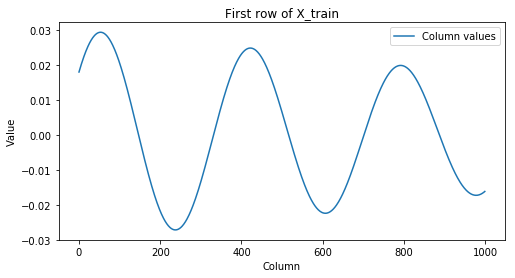

In [110]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(np.arange(1000), X_train[0,:], label='Column values')
ax.legend()
ax.set_title('First row of X_train')
ax.set_xlabel('Column')
ax.set_ylabel('Value')

**7.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced points in $[0,10\pi]$ from the function $f(x) = 0.24\sin(0.533\,x) + 0.018\cos(0.558\,x)$...

Text(0,0.5,'Value')

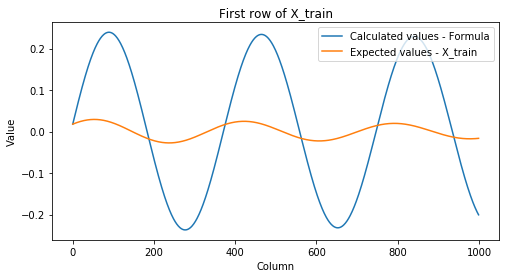

In [129]:
# your code here
from math import pi, sin, cos

calculated_values = []
for x in np.arange(start=0, stop=10*pi, step=10*pi/1000):
    y = 0.24*sin(0.533*x)+0.018*cos(0.558*x)
    calculated_values = np.append(calculated_values, y)        

fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.plot(np.arange(1000), calculated_values, label='Calculated values - Formula')
ax.plot(np.arange(1000), X_train[0,:], label='Expected values - X_train')
ax.legend()
ax.set_title('First row of X_train')
ax.set_xlabel('Column')
ax.set_ylabel('Value')

**7.3** Use `Sequential` and `Dense` from Keras to build a fully-connected neural network. You can choose any number of layers and any number of nodes in each layer. 

In [31]:
# your code here

**7.4** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

In [32]:
# your code here

----
Your answer here

----

**7.5** Fit your model to the data for 50 epochs using a batch size of 32 and a validation split of .2. You can train for longer if you wish- the fit tends to improve over time.

In [33]:
# your code here

**7.6** Use the `plot_predictions` function to plot the model's predictions on `X-test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefecients that generated the data?

In [34]:
# your code here

----
Your answer here

----

**7.7** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?

In [35]:
# your code here

----
Your answer here

----

**7.8** Is there something that stands out about the difficult observations, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

----
Your answer here

----